<a href="https://colab.research.google.com/github/MoMus2000/DCGAN-/blob/master/Creatingfaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import os
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Conv2DTranspose,Reshape,LeakyReLU,Dropout,BatchNormalization,Activation,UpSampling2D,MaxPooling2D
from tensorflow.keras.models import Sequential
import time
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt


In [2]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [3]:
! kaggle datasets download -d greg115/celebrities-100k

 97% 805M/828M [00:06<00:00, 112MB/s]
100% 828M/828M [00:06<00:00, 134MB/s]


In [4]:
!unzip /content/celebrities-100k.zip

Streaming output truncated to the last 5000 lines.
  inflating: 100k/100k/192420.jpg    
  inflating: 100k/100k/192422.jpg    
  inflating: 100k/100k/192424.jpg    
  inflating: 100k/100k/192428.jpg    
  inflating: 100k/100k/192429.jpg    
  inflating: 100k/100k/192430.jpg    
  inflating: 100k/100k/192435.jpg    
  inflating: 100k/100k/192437.jpg    
  inflating: 100k/100k/192438.jpg    
  inflating: 100k/100k/192440.jpg    
  inflating: 100k/100k/192442.jpg    
  inflating: 100k/100k/192444.jpg    
  inflating: 100k/100k/192445.jpg    
  inflating: 100k/100k/192447.jpg    
  inflating: 100k/100k/192448.jpg    
  inflating: 100k/100k/192450.jpg    
  inflating: 100k/100k/192456.jpg    
  inflating: 100k/100k/192457.jpg    
  inflating: 100k/100k/192460.jpg    
  inflating: 100k/100k/192465.jpg    
  inflating: 100k/100k/192467.jpg    
  inflating: 100k/100k/192468.jpg    
  inflating: 100k/100k/192469.jpg    
  inflating: 100k/100k/192471.jpg    
  inflating: 100k/100k/192473.jpg    

In [6]:
folder = []
def load_Image(folder):
    images = []
    for j in range(len(folder)):
        for filename in os.listdir(folder[j]):
            img = cv2.imread(os.path.join(folder[j],filename))
            img = cv2.resize(img,(64,64))
            if img is not None and len(images)<15000:
                images.append(img)
    return np.asarray(images)

test = ['/content/100k/100k']
x = load_Image(test)


In [14]:
x = (x - 127.5) / 127.5

In [15]:
dis_learning_rate = 0.0004
gen_learning_rate = 0.0004
dis_momentum = 0.9
gen_momentum = 0.9
dis_nesterov = True
gen_nesterov = True

dis_optimizer = SGD(lr=dis_learning_rate, momentum=dis_momentum,
nesterov=dis_nesterov)
gen_optimizer = SGD(lr=gen_learning_rate, momentum=gen_momentum,
nesterov=gen_nesterov)

gen_model = Sequential()
gen_model.add(Dense(units=2048))
gen_model.add(Activation('tanh'))
gen_model.add(Dense(256 * 8 * 8))
gen_model.add(BatchNormalization())
gen_model.add(LeakyReLU(alpha=0.2))
gen_model.add(Reshape((8, 8, 256), input_shape=(256 * 8 * 8,)))
gen_model.add(UpSampling2D(size=(2, 2)))
gen_model.add(Conv2D(128, (5, 5), padding='same'))
gen_model.add(LeakyReLU(alpha=0.2))
gen_model.add(UpSampling2D(size=(2, 2)))
gen_model.add(Conv2D(64, (5, 5), padding='same'))
gen_model.add(LeakyReLU(alpha=0.2))
gen_model.add(UpSampling2D(size=(2, 2)))
gen_model.add(Conv2D(3, (5, 5), padding='same'))
gen_model.add(LeakyReLU(alpha=0.2))






In [16]:
dis_model = Sequential()
dis_model.add(
Conv2D(128, (5, 5),
padding='same',
input_shape=(64, 64, 3))
)
dis_model.add(LeakyReLU(alpha=0.2))
dis_model.add(MaxPooling2D(pool_size=(2, 2)))
dis_model.add(Conv2D(256, (3, 3)))
dis_model.add(LeakyReLU(alpha=0.2))
dis_model.add(MaxPooling2D(pool_size=(2, 2)))
dis_model.add(Conv2D(512, (3, 3)))
dis_model.add(LeakyReLU(alpha=0.2))
dis_model.add(MaxPooling2D(pool_size=(2, 2)))
dis_model.add(Flatten())
dis_model.add(Dense(1024))
dis_model.add(LeakyReLU(alpha=0.2))
dis_model.add(Dense(1))
dis_model.add(Activation('sigmoid'))
dis_model.compile(loss='binary_crossentropy',
optimizer=dis_optimizer)

In [17]:
GAN = Sequential([gen_model,dis_model])
dis_model.trainable = False
GAN.compile(loss='binary_crossentropy',
optimizer=gen_optimizer)

In [18]:
batch_size = 256
my_data = x
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size =1000)
dataset = dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [19]:
epochs=1000

generator, discriminator = GAN.layers


Currently on epoch 1
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.215924024581909 and Discriminator loss: 0.08755447715520859


<Figure size 432x288 with 0 Axes>

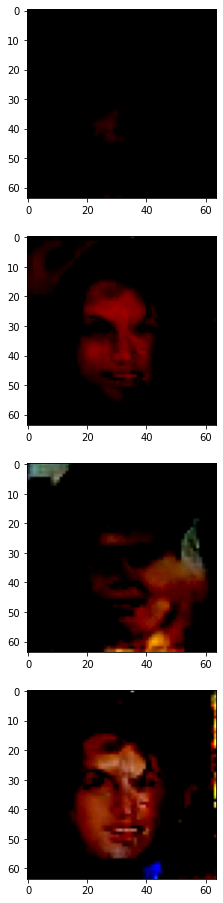

Currently on epoch 2
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.664182662963867 and Discriminator loss: 0.1208198294043541


<Figure size 432x288 with 0 Axes>

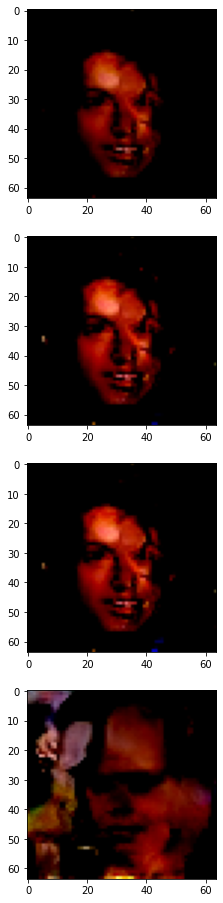

Currently on epoch 3
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 2.737123966217041 and Discriminator loss: 0.12259764224290848


<Figure size 432x288 with 0 Axes>

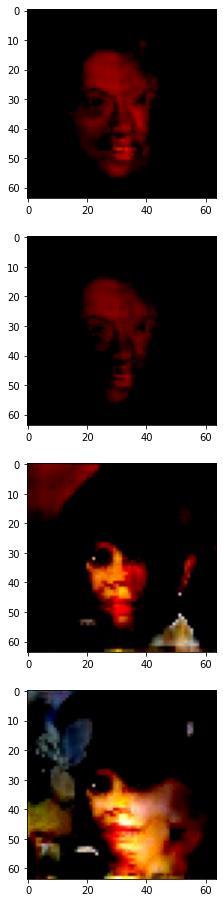

Currently on epoch 4
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.5277998447418213 and Discriminator loss: 0.06979510188102722


<Figure size 432x288 with 0 Axes>

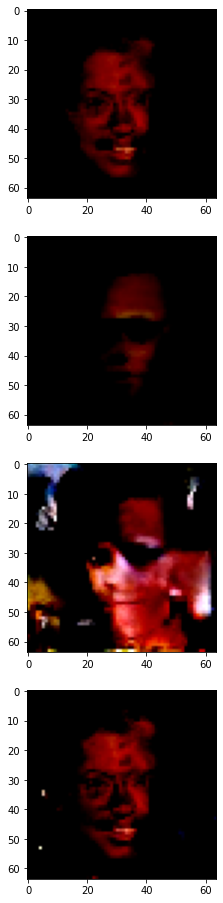

Currently on epoch 5
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.6995112895965576 and Discriminator loss: 0.15282197296619415


<Figure size 432x288 with 0 Axes>

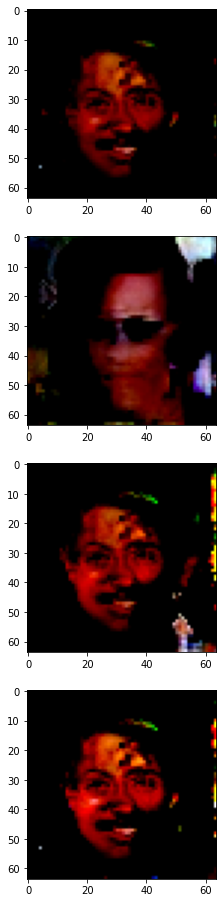

Currently on epoch 6
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 4.36600923538208 and Discriminator loss: 0.3625103831291199


<Figure size 432x288 with 0 Axes>

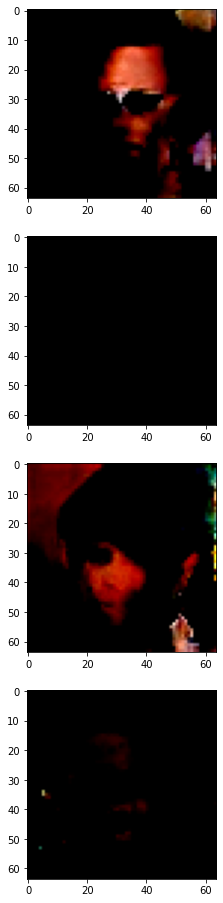

Currently on epoch 7
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.920745849609375 and Discriminator loss: 0.05160960927605629


<Figure size 432x288 with 0 Axes>

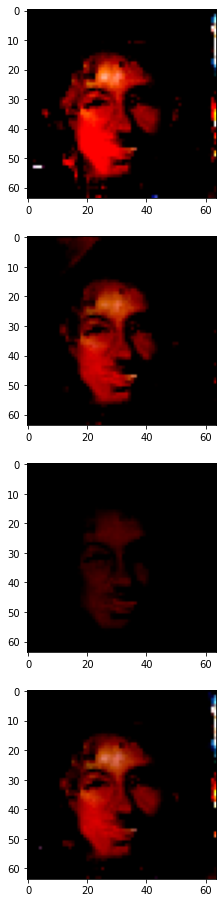

Currently on epoch 8
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.6799118518829346 and Discriminator loss: 0.17328710854053497


<Figure size 432x288 with 0 Axes>

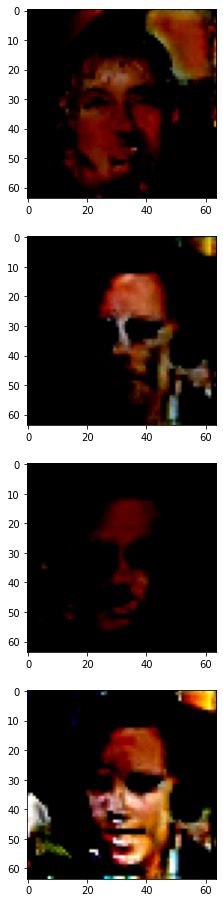

Currently on epoch 9
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.58878755569458 and Discriminator loss: 0.12450414150953293


<Figure size 432x288 with 0 Axes>

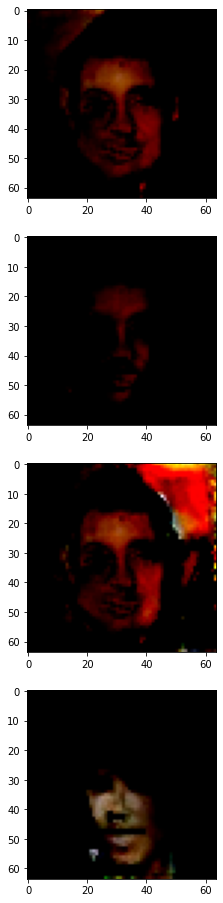

Currently on epoch 10
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.8794357776641846 and Discriminator loss: 0.0836390033364296


<Figure size 432x288 with 0 Axes>

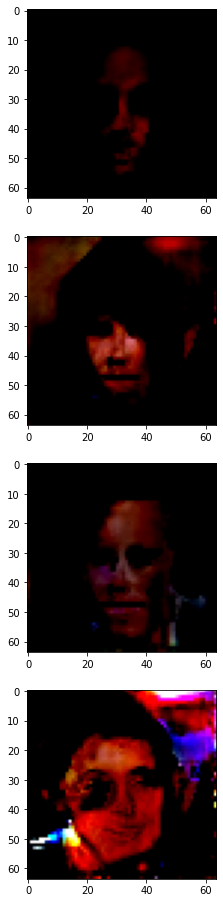

Currently on epoch 11
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.8438515663146973 and Discriminator loss: 0.11155485361814499


<Figure size 432x288 with 0 Axes>

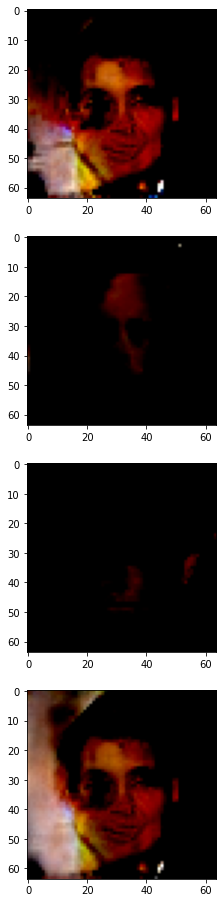

Currently on epoch 12
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.574000358581543 and Discriminator loss: 0.08161526173353195


<Figure size 432x288 with 0 Axes>

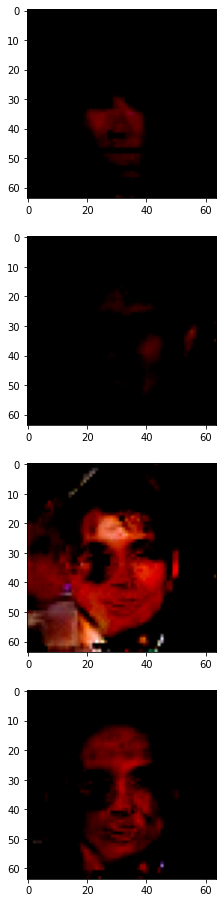

Currently on epoch 13
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.219705104827881 and Discriminator loss: 0.09600631147623062


<Figure size 432x288 with 0 Axes>

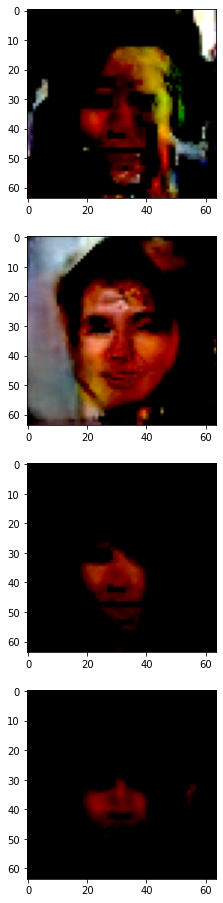

Currently on epoch 14
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.424220561981201 and Discriminator loss: 0.09217271208763123


<Figure size 432x288 with 0 Axes>

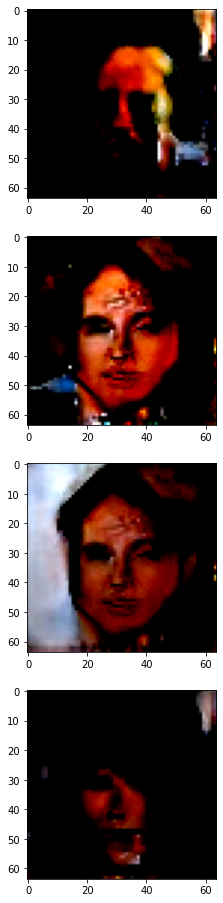

Currently on epoch 15
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.685361385345459 and Discriminator loss: 0.09413506090641022


<Figure size 432x288 with 0 Axes>

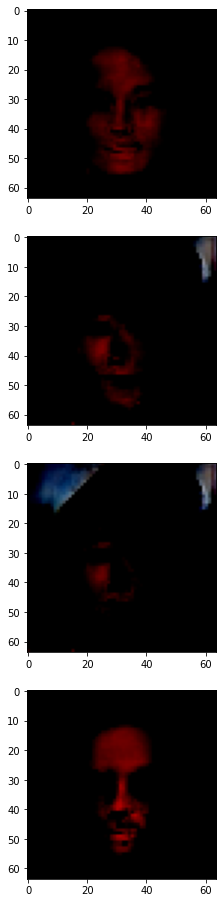

Currently on epoch 16
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.3162882328033447 and Discriminator loss: 0.07382073253393173


<Figure size 432x288 with 0 Axes>

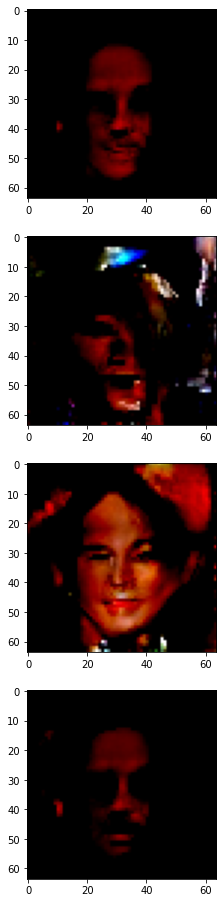

Currently on epoch 17
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.2915940284729004 and Discriminator loss: 0.08782559633255005


<Figure size 432x288 with 0 Axes>

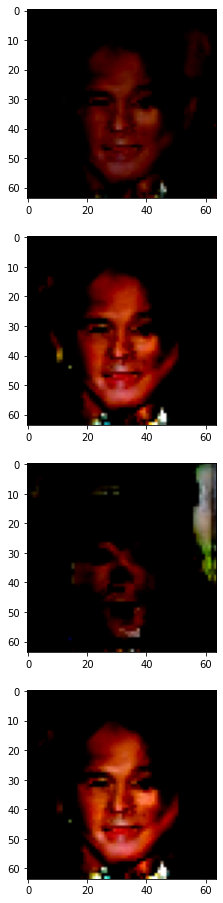

Currently on epoch 18
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 4.146427631378174 and Discriminator loss: 0.4391360878944397


<Figure size 432x288 with 0 Axes>

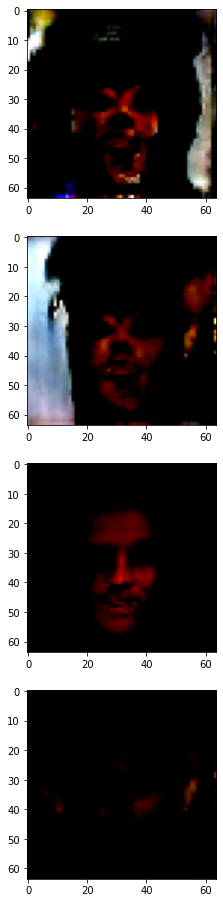

Currently on epoch 19
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 2.6470096111297607 and Discriminator loss: 0.10143359005451202


<Figure size 432x288 with 0 Axes>

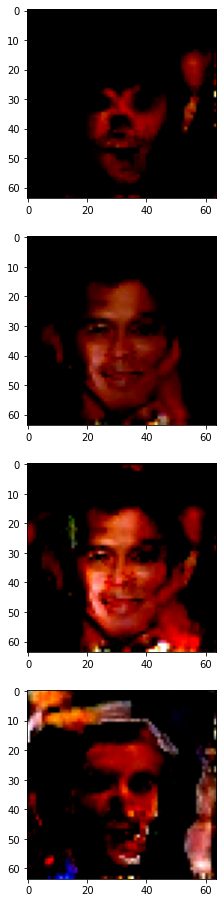

Currently on epoch 20
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 2.7105607986450195 and Discriminator loss: 0.0756363496184349


<Figure size 432x288 with 0 Axes>

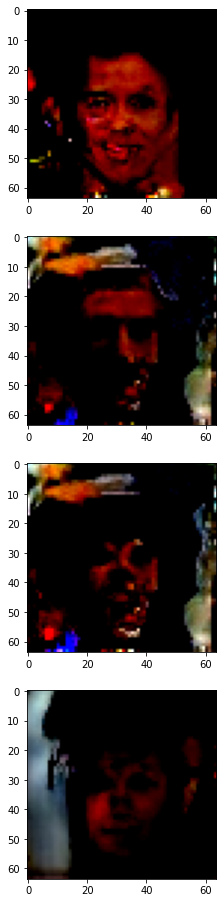

Currently on epoch 21
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 2.755819320678711 and Discriminator loss: 0.1775750368833542


<Figure size 432x288 with 0 Axes>

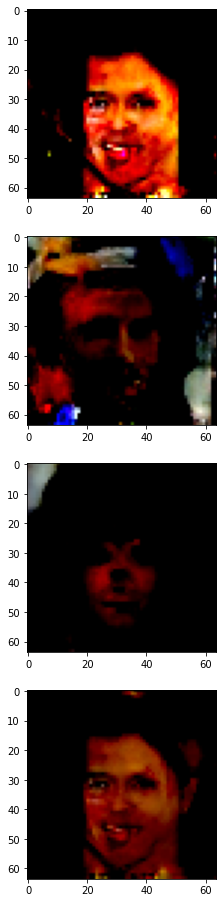

Currently on epoch 22
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.429513931274414 and Discriminator loss: 0.09780962020158768


<Figure size 432x288 with 0 Axes>

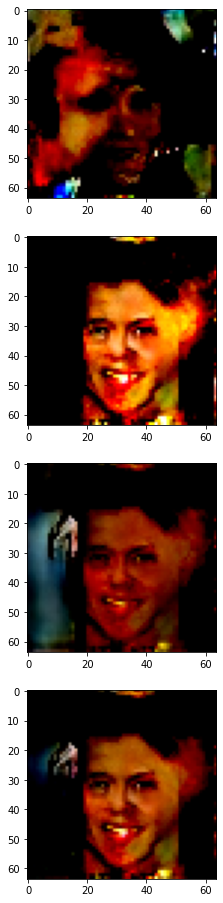

Currently on epoch 23
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 2.7211763858795166 and Discriminator loss: 0.15615233778953552


<Figure size 432x288 with 0 Axes>

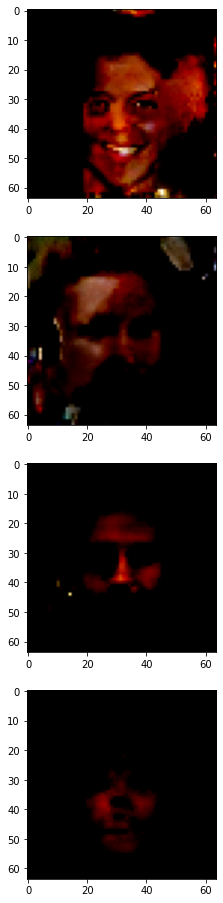

Currently on epoch 24
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.054314136505127 and Discriminator loss: 0.13524489104747772


<Figure size 432x288 with 0 Axes>

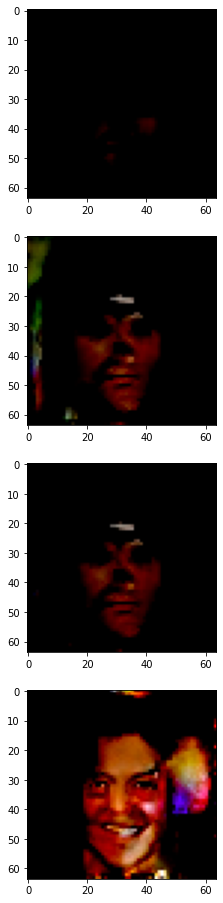

Currently on epoch 25
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.5043485164642334 and Discriminator loss: 0.15499278903007507


<Figure size 432x288 with 0 Axes>

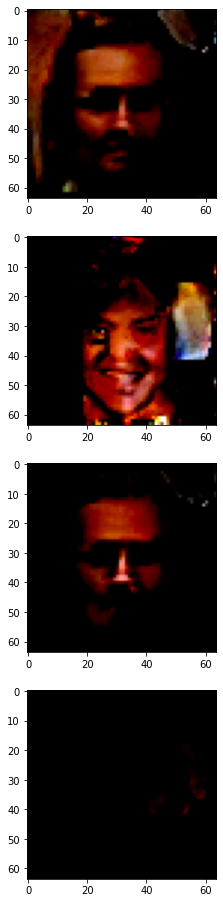

Currently on epoch 26
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 2.9176149368286133 and Discriminator loss: 0.1249784380197525


<Figure size 432x288 with 0 Axes>

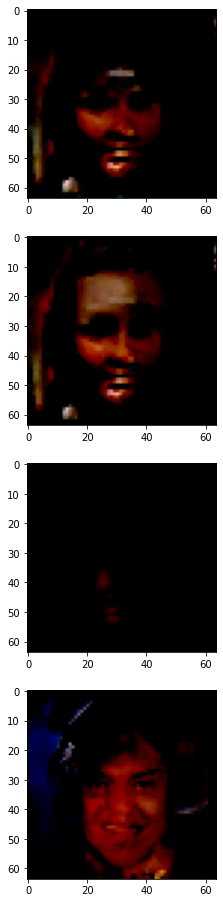

Currently on epoch 27
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.2278571128845215 and Discriminator loss: 0.12041699886322021


<Figure size 432x288 with 0 Axes>

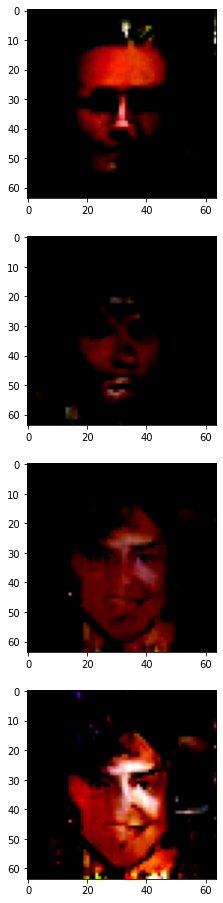

Currently on epoch 28
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.292461395263672 and Discriminator loss: 0.10193082690238953


<Figure size 432x288 with 0 Axes>

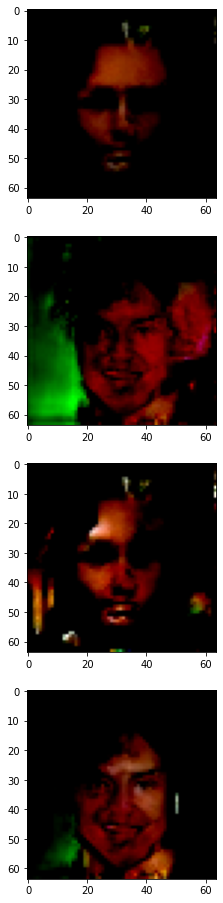

Currently on epoch 29
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.737323760986328 and Discriminator loss: 0.07900130748748779


<Figure size 432x288 with 0 Axes>

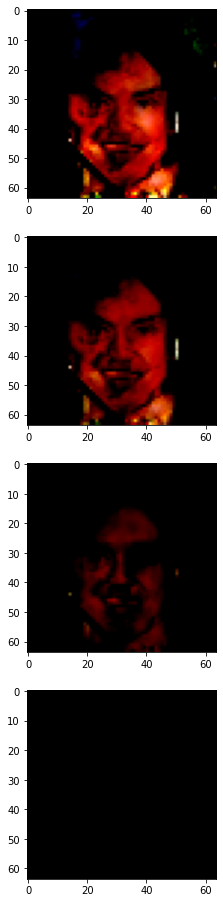

Currently on epoch 30
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 4.439092636108398 and Discriminator loss: 0.05715785175561905


<Figure size 432x288 with 0 Axes>

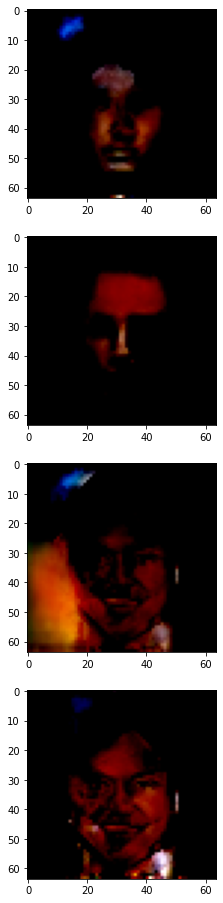

Currently on epoch 31
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.2236104011535645 and Discriminator loss: 0.14520302414894104


<Figure size 432x288 with 0 Axes>

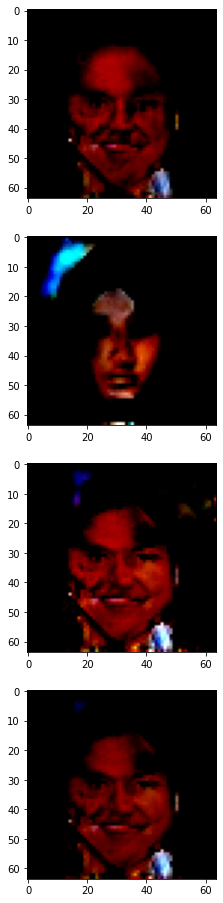

Currently on epoch 32
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.200399875640869 and Discriminator loss: 0.13728518784046173


<Figure size 432x288 with 0 Axes>

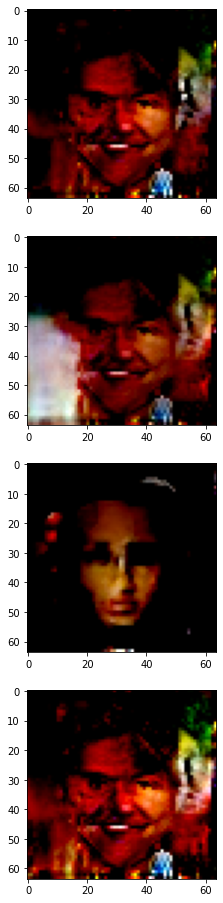

Currently on epoch 33
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.1987738609313965 and Discriminator loss: 0.1142299622297287


<Figure size 432x288 with 0 Axes>

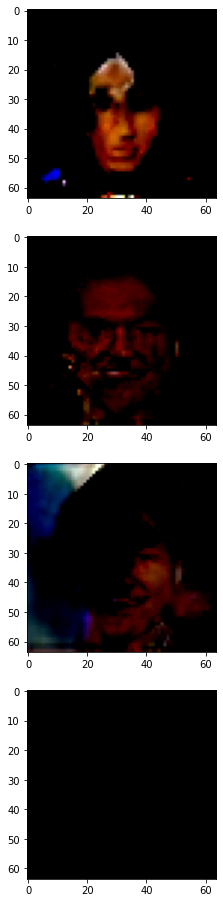

Currently on epoch 34
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.6295738220214844 and Discriminator loss: 0.12107983231544495


<Figure size 432x288 with 0 Axes>

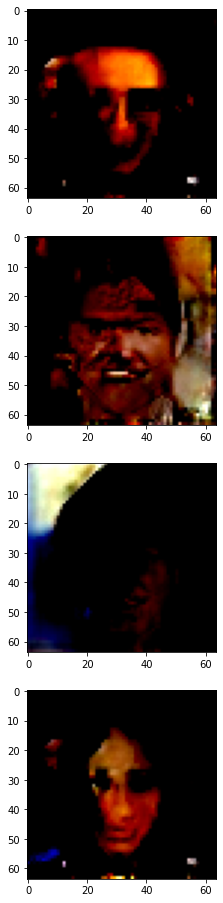

Currently on epoch 35
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.057058095932007 and Discriminator loss: 0.17644083499908447


<Figure size 432x288 with 0 Axes>

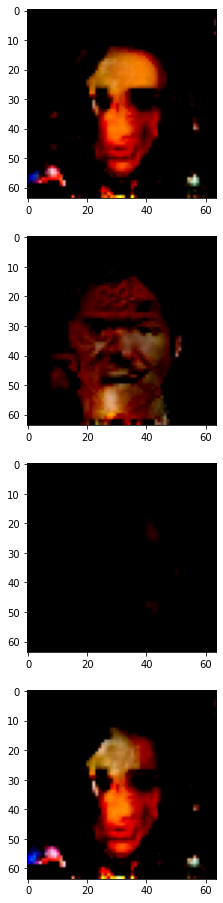

Currently on epoch 36
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.3089914321899414 and Discriminator loss: 0.1012166440486908


<Figure size 432x288 with 0 Axes>

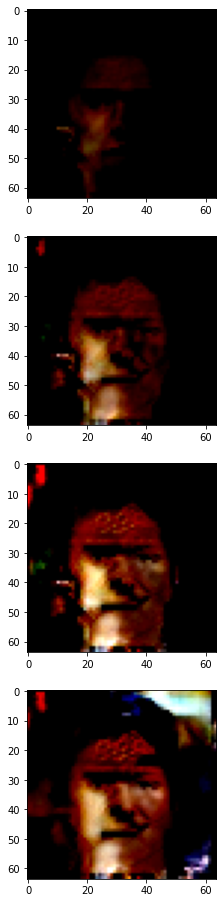

Currently on epoch 37
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.2662808895111084 and Discriminator loss: 0.08452633768320084


<Figure size 432x288 with 0 Axes>

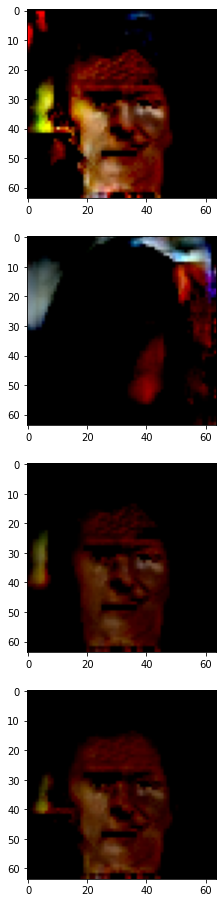

Currently on epoch 38
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.4834229946136475 and Discriminator loss: 0.08476737886667252


<Figure size 432x288 with 0 Axes>

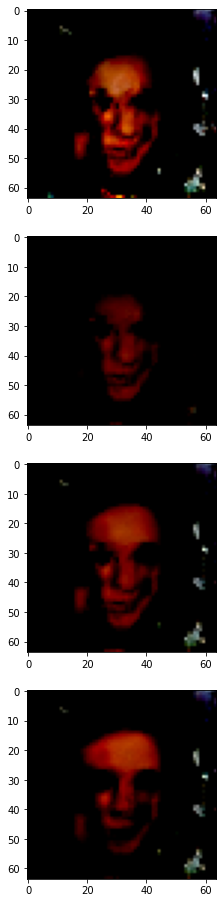

Currently on epoch 39
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 5.01547908782959 and Discriminator loss: 0.09005682915449142


<Figure size 432x288 with 0 Axes>

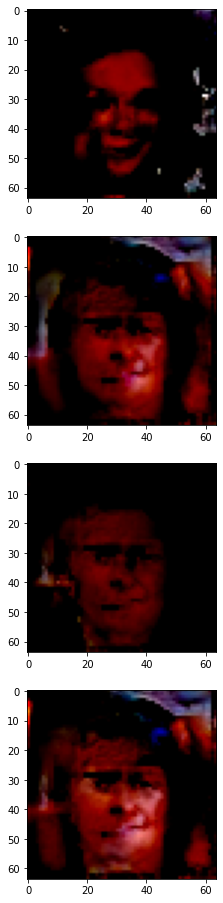

Currently on epoch 40
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.827061891555786 and Discriminator loss: 0.08730973303318024


<Figure size 432x288 with 0 Axes>

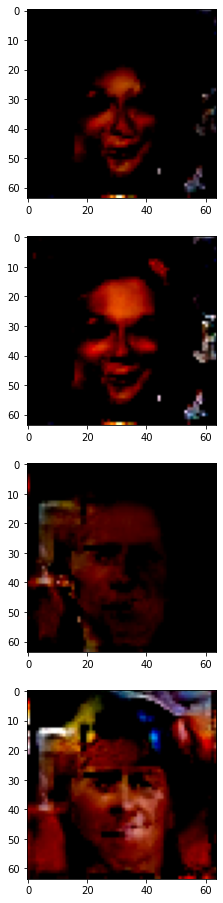

Currently on epoch 41
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.7313742637634277 and Discriminator loss: 0.06604699790477753


<Figure size 432x288 with 0 Axes>

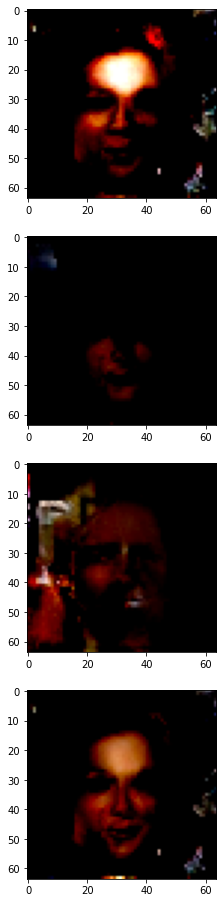

Currently on epoch 42
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.862203359603882 and Discriminator loss: 0.0654926598072052


<Figure size 432x288 with 0 Axes>

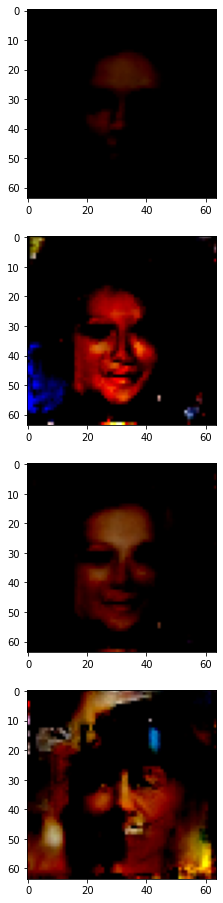

Currently on epoch 43
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.9509716033935547 and Discriminator loss: 0.06546862423419952


<Figure size 432x288 with 0 Axes>

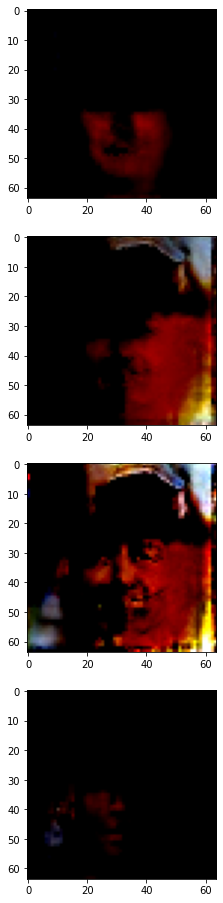

Currently on epoch 44
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.788024425506592 and Discriminator loss: 0.10176697373390198


<Figure size 432x288 with 0 Axes>

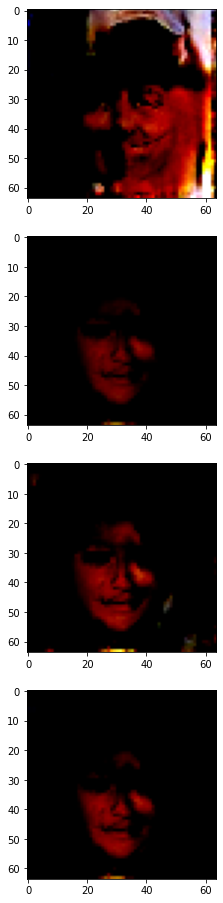

Currently on epoch 45
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 7.443759441375732 and Discriminator loss: 0.20942354202270508


<Figure size 432x288 with 0 Axes>

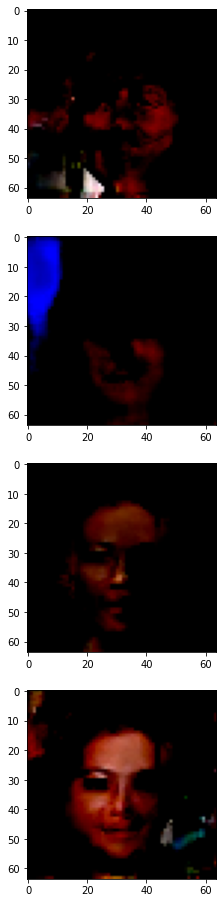

Currently on epoch 46
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.279650926589966 and Discriminator loss: 0.0730370432138443


<Figure size 432x288 with 0 Axes>

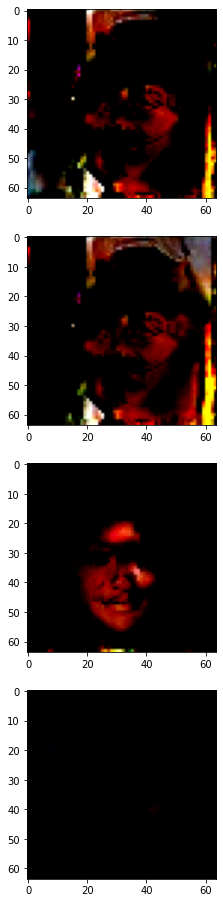

Currently on epoch 47
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 6.386282920837402 and Discriminator loss: 0.3160092234611511


<Figure size 432x288 with 0 Axes>

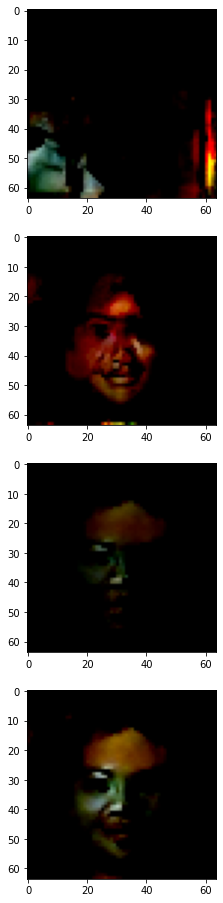

Currently on epoch 48
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 2.9569671154022217 and Discriminator loss: 0.12415307760238647


<Figure size 432x288 with 0 Axes>

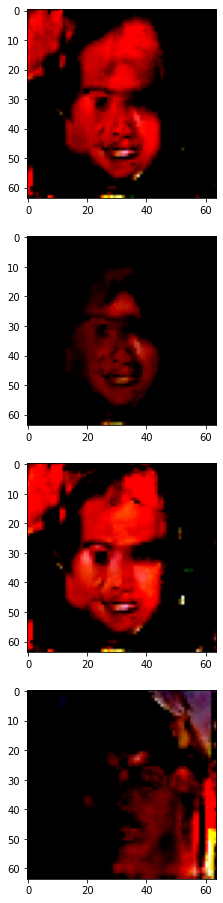

Currently on epoch 49
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 2.274766206741333 and Discriminator loss: 0.18242372572422028


<Figure size 432x288 with 0 Axes>

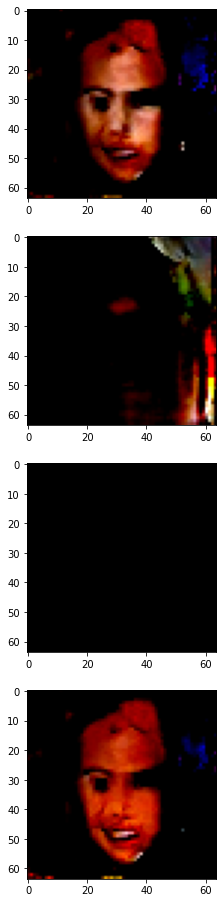

Currently on epoch 50
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 1.9754036664962769 and Discriminator loss: 0.33365392684936523


<Figure size 432x288 with 0 Axes>

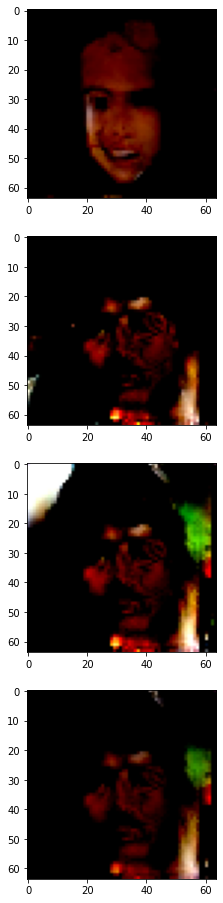

Currently on epoch 51
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.201493978500366 and Discriminator loss: 0.07107201963663101


<Figure size 432x288 with 0 Axes>

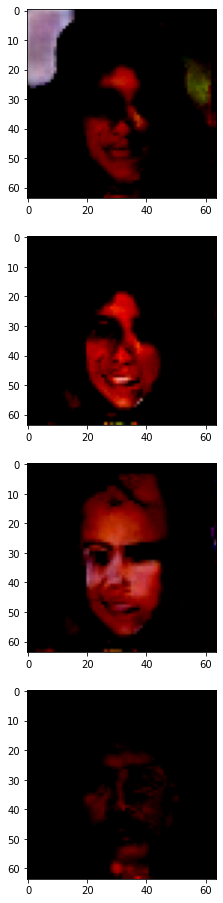

Currently on epoch 52
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.0937352180480957 and Discriminator loss: 0.12503817677497864


<Figure size 432x288 with 0 Axes>

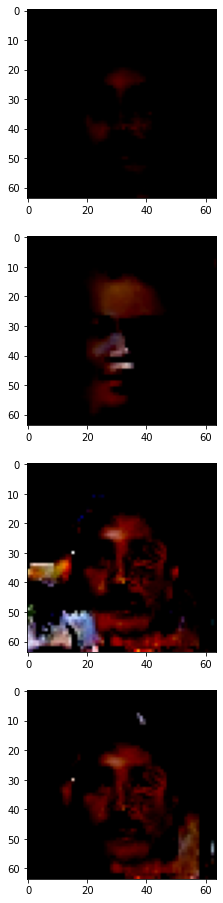

Currently on epoch 53
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 2.8895459175109863 and Discriminator loss: 0.1295117735862732


<Figure size 432x288 with 0 Axes>

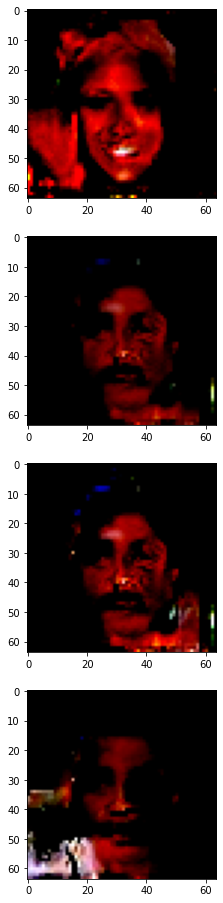

Currently on epoch 54
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.207963466644287 and Discriminator loss: 0.17517182230949402


<Figure size 432x288 with 0 Axes>

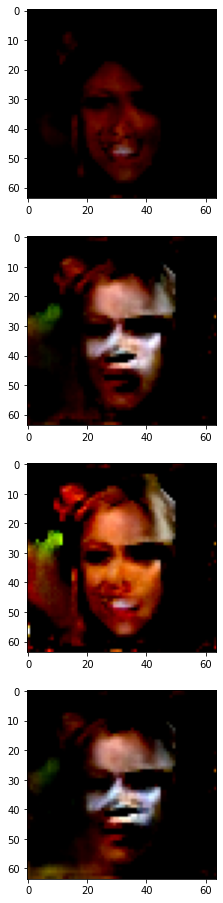

Currently on epoch 55
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 4.7554097175598145 and Discriminator loss: 0.10764873027801514


<Figure size 432x288 with 0 Axes>

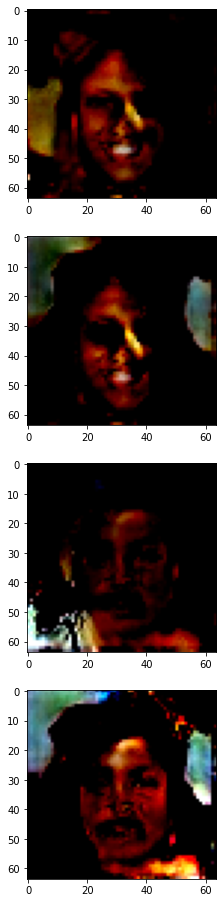

Currently on epoch 56
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.692028045654297 and Discriminator loss: 0.22729909420013428


<Figure size 432x288 with 0 Axes>

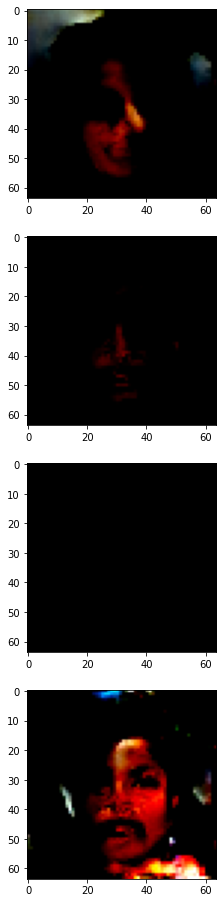

Currently on epoch 57
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.70280122756958 and Discriminator loss: 0.10205189138650894


<Figure size 432x288 with 0 Axes>

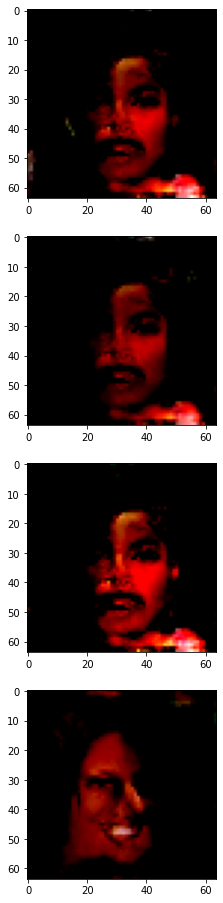

Currently on epoch 58
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.9199159145355225 and Discriminator loss: 0.07800418883562088


<Figure size 432x288 with 0 Axes>

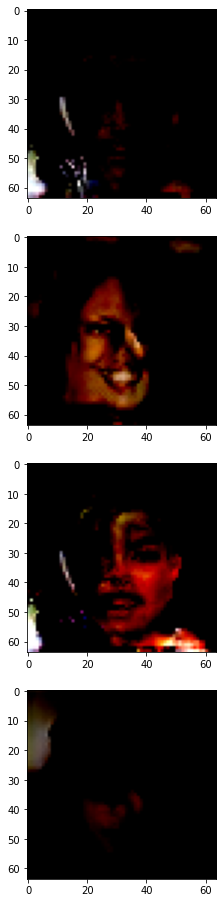

Currently on epoch 59
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 2.924452304840088 and Discriminator loss: 0.11552994698286057


<Figure size 432x288 with 0 Axes>

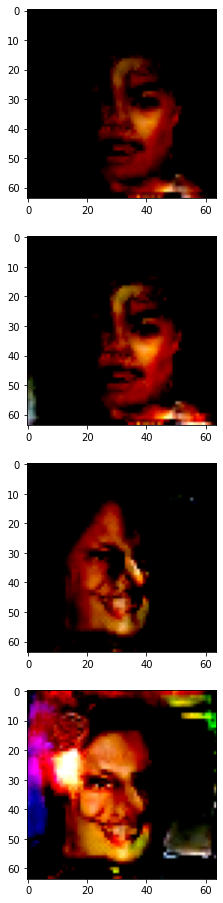

Currently on epoch 60
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.268195867538452 and Discriminator loss: 0.10255038738250732


<Figure size 432x288 with 0 Axes>

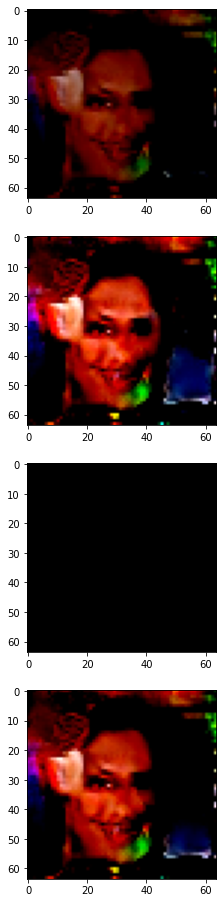

Currently on epoch 61
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.3869757652282715 and Discriminator loss: 0.11096782237291336


<Figure size 432x288 with 0 Axes>

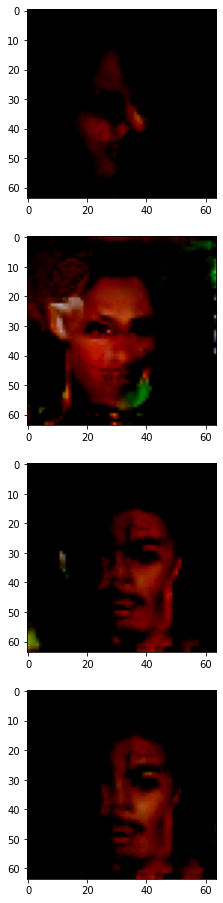

Currently on epoch 62
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.5665807723999023 and Discriminator loss: 0.06581257283687592


<Figure size 432x288 with 0 Axes>

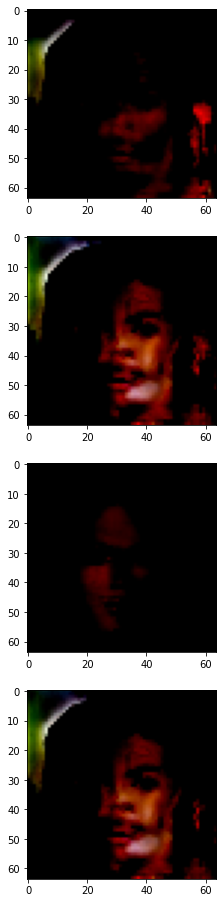

Currently on epoch 63
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 4.0308356285095215 and Discriminator loss: 0.07265756279230118


<Figure size 432x288 with 0 Axes>

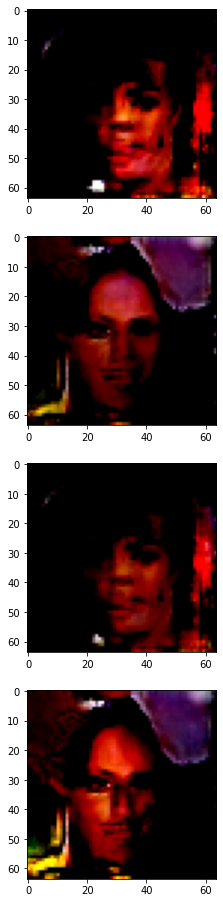

Currently on epoch 64
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.115556478500366 and Discriminator loss: 0.11781463772058487


<Figure size 432x288 with 0 Axes>

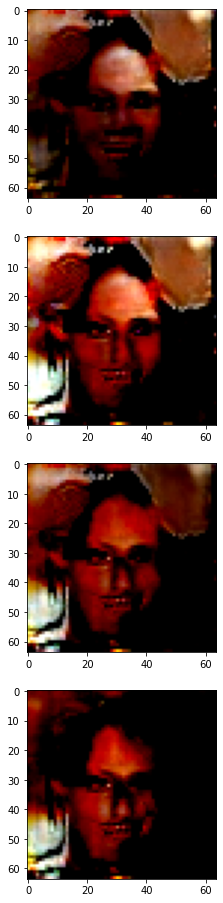

Currently on epoch 65
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.4475224018096924 and Discriminator loss: 0.05220998078584671


<Figure size 432x288 with 0 Axes>

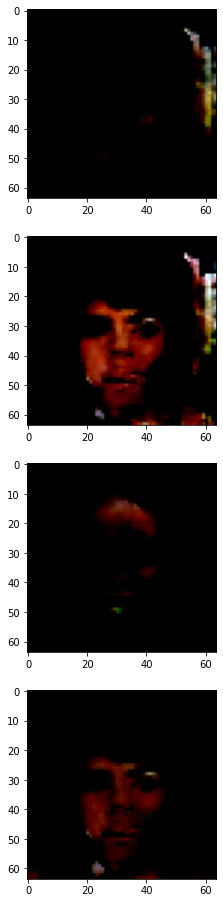

Currently on epoch 66
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.110034942626953 and Discriminator loss: 0.08456982672214508


<Figure size 432x288 with 0 Axes>

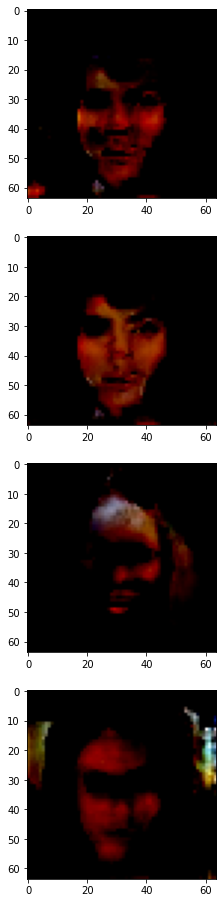

Currently on epoch 67
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.2164242267608643 and Discriminator loss: 0.06765346229076385


<Figure size 432x288 with 0 Axes>

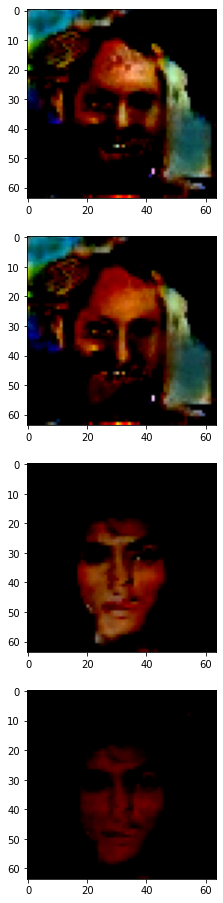

Currently on epoch 68
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 2.929582357406616 and Discriminator loss: 0.10603249073028564


<Figure size 432x288 with 0 Axes>

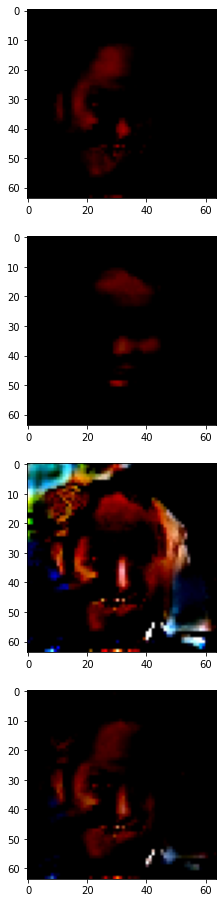

Currently on epoch 69
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.013652801513672 and Discriminator loss: 0.10306878387928009


<Figure size 432x288 with 0 Axes>

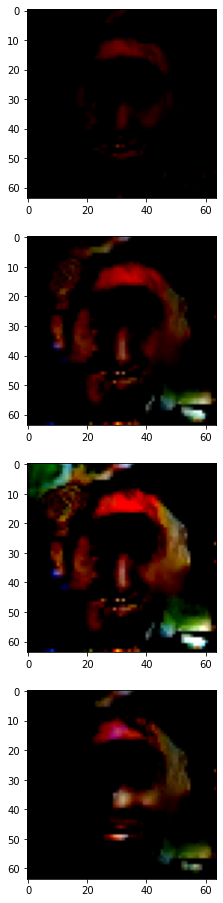

Currently on epoch 70
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.2250707149505615 and Discriminator loss: 0.07456879317760468


<Figure size 432x288 with 0 Axes>

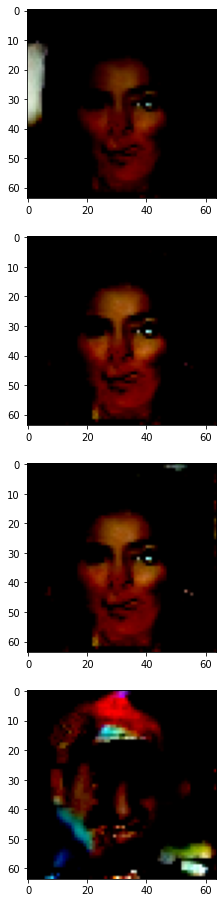

Currently on epoch 71
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 4.072497844696045 and Discriminator loss: 0.1251215636730194


<Figure size 432x288 with 0 Axes>

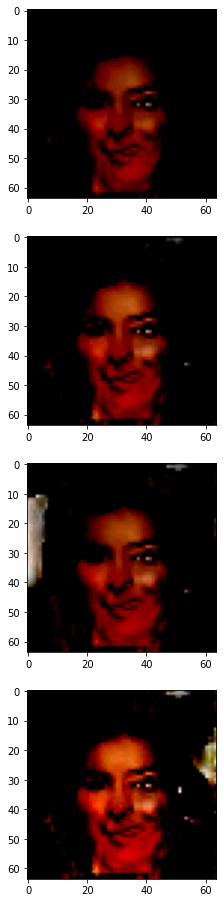

Currently on epoch 72
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.5878918170928955 and Discriminator loss: 0.06801357865333557


<Figure size 432x288 with 0 Axes>

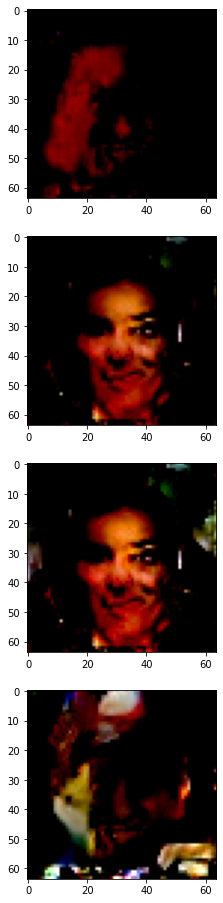

Currently on epoch 73
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.7271876335144043 and Discriminator loss: 0.0641414150595665


<Figure size 432x288 with 0 Axes>

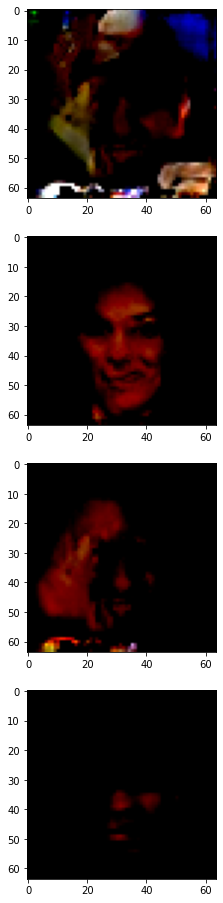

Currently on epoch 74
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.3577184677124023 and Discriminator loss: 0.0993632823228836


<Figure size 432x288 with 0 Axes>

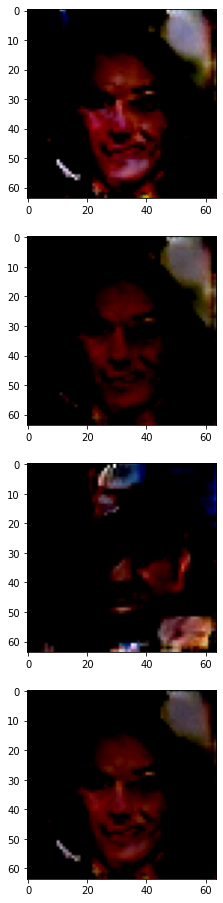

Currently on epoch 75
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.0734364986419678 and Discriminator loss: 0.08680638670921326


<Figure size 432x288 with 0 Axes>

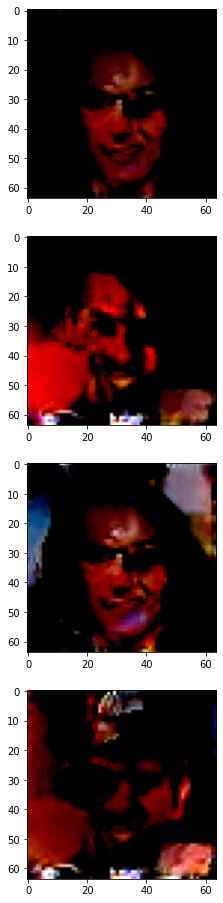

Currently on epoch 76
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.1541852951049805 and Discriminator loss: 0.10769893229007721


<Figure size 432x288 with 0 Axes>

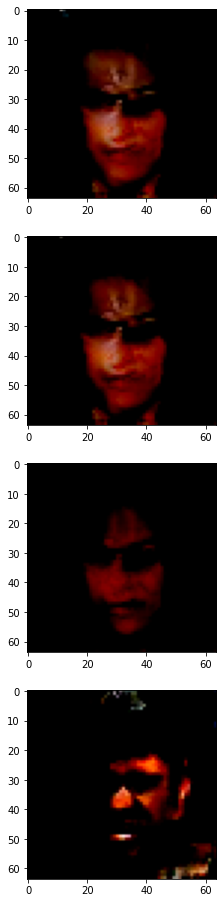

Currently on epoch 77
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.9407222270965576 and Discriminator loss: 0.14062988758087158


<Figure size 432x288 with 0 Axes>

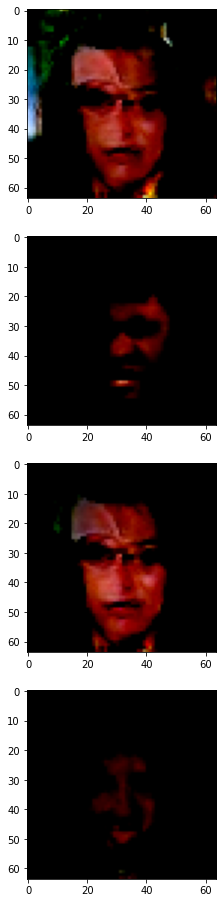

Currently on epoch 78
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 4.517425537109375 and Discriminator loss: 0.08706726878881454


<Figure size 432x288 with 0 Axes>

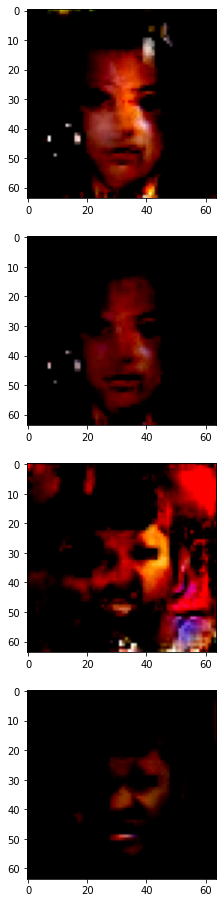

Currently on epoch 79
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 5.547603607177734 and Discriminator loss: 0.12692636251449585


<Figure size 432x288 with 0 Axes>

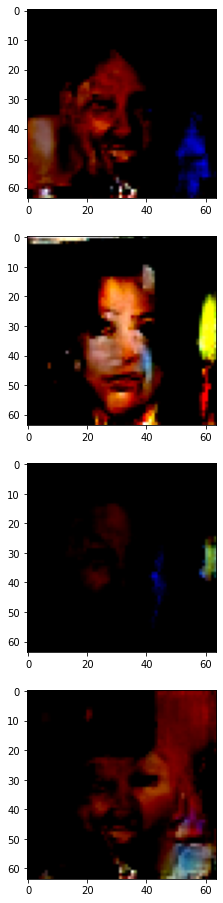

Currently on epoch 80
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.188682794570923 and Discriminator loss: 0.10968457162380219


<Figure size 432x288 with 0 Axes>

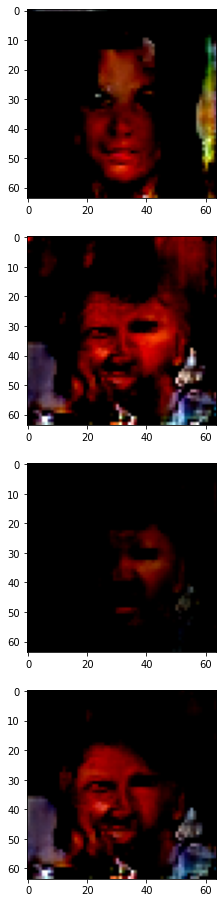

Currently on epoch 81
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 4.355125427246094 and Discriminator loss: 0.08156872540712357


<Figure size 432x288 with 0 Axes>

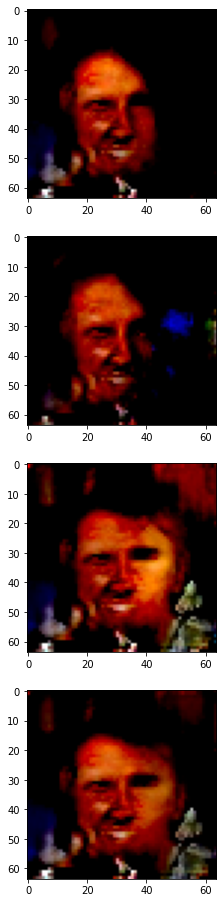

Currently on epoch 82
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.2576241493225098 and Discriminator loss: 0.07002890855073929


<Figure size 432x288 with 0 Axes>

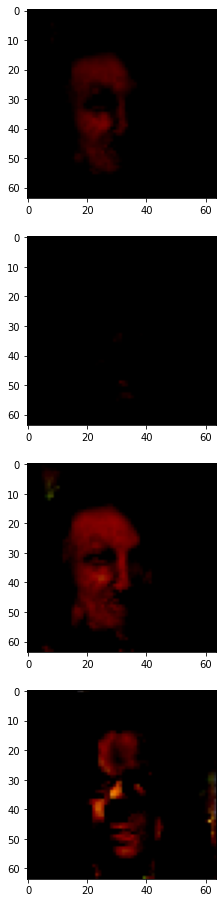

Currently on epoch 83
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 5.188785076141357 and Discriminator loss: 0.14158344268798828


<Figure size 432x288 with 0 Axes>

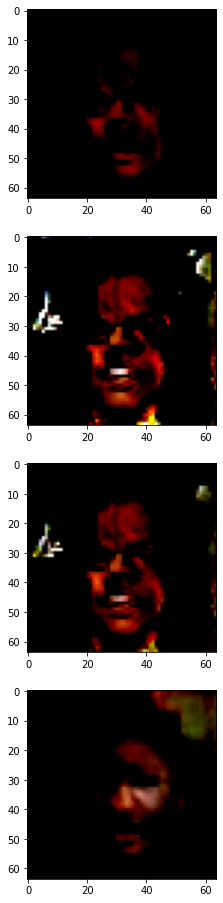

Currently on epoch 84
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.3487586975097656 and Discriminator loss: 0.11162988841533661


<Figure size 432x288 with 0 Axes>

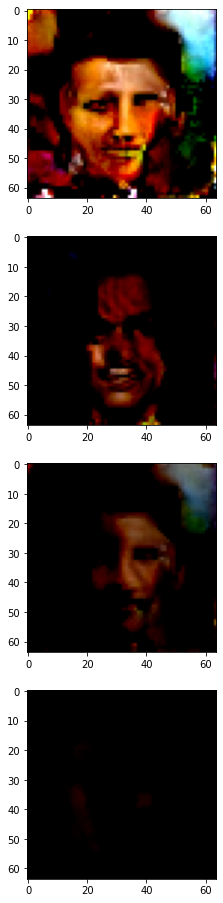

Currently on epoch 85
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.776190757751465 and Discriminator loss: 0.09309317916631699


<Figure size 432x288 with 0 Axes>

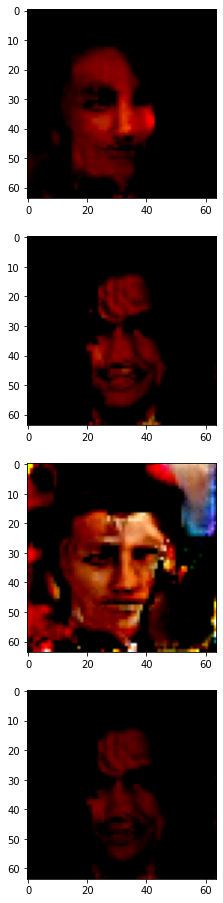

Currently on epoch 86
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 4.54562520980835 and Discriminator loss: 0.04873443394899368


<Figure size 432x288 with 0 Axes>

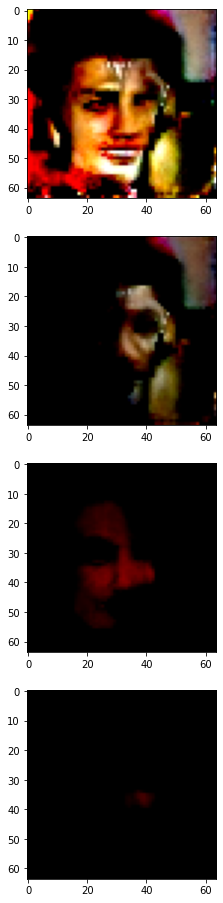

Currently on epoch 87
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.474646806716919 and Discriminator loss: 0.09204515814781189


<Figure size 432x288 with 0 Axes>

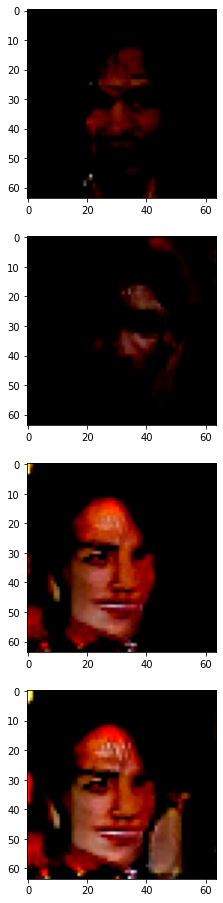

Currently on epoch 88
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.815328598022461 and Discriminator loss: 0.08807036280632019


<Figure size 432x288 with 0 Axes>

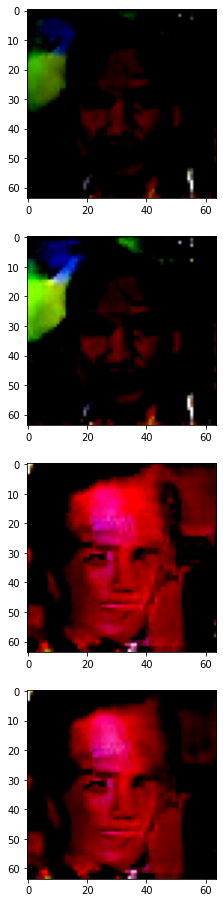

Currently on epoch 89
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 4.322731971740723 and Discriminator loss: 0.09812982380390167


<Figure size 432x288 with 0 Axes>

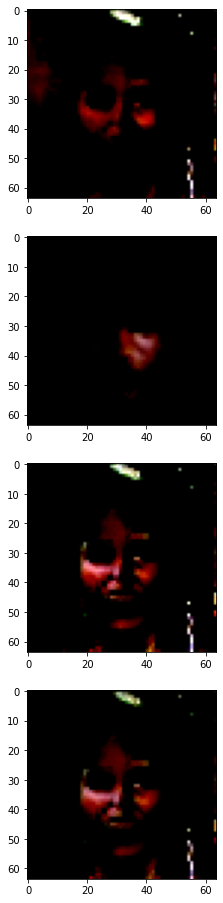

Currently on epoch 90
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.5865683555603027 and Discriminator loss: 0.08792334794998169


<Figure size 432x288 with 0 Axes>

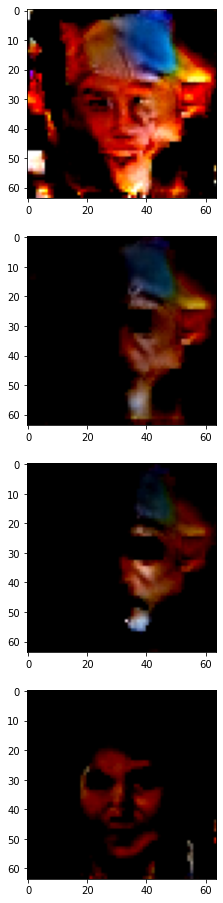

Currently on epoch 91
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.8129210472106934 and Discriminator loss: 0.13337795436382294


<Figure size 432x288 with 0 Axes>

Currently on epoch 92
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 4.942994117736816 and Discriminator loss: 0.18065208196640015


<Figure size 432x288 with 0 Axes>

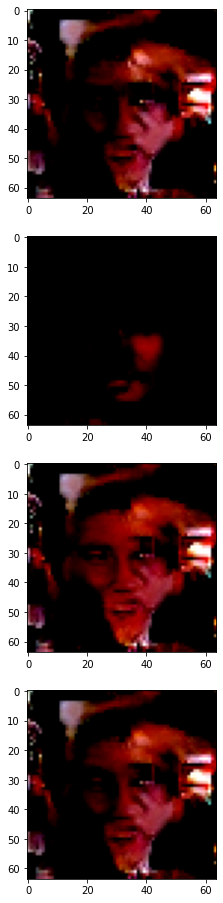

Currently on epoch 93
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.308551549911499 and Discriminator loss: 0.07766059041023254


<Figure size 432x288 with 0 Axes>

Currently on epoch 94
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 4.233644485473633 and Discriminator loss: 0.11107966303825378


<Figure size 432x288 with 0 Axes>

Currently on epoch 95
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.5152671337127686 and Discriminator loss: 0.08458023518323898


<Figure size 432x288 with 0 Axes>

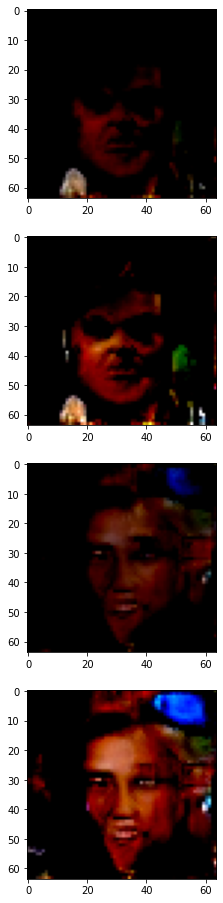

Currently on epoch 96
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.3134610652923584 and Discriminator loss: 0.14672769606113434


<Figure size 432x288 with 0 Axes>

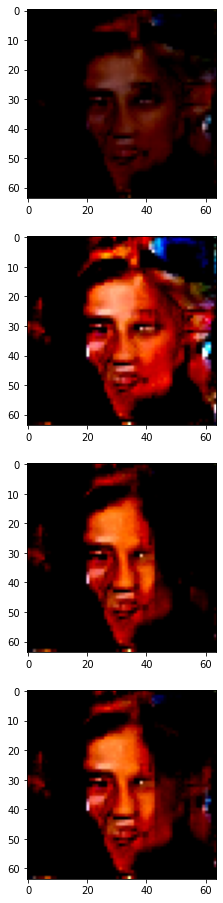

Currently on epoch 97
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.055598735809326 and Discriminator loss: 0.0744016021490097


<Figure size 432x288 with 0 Axes>

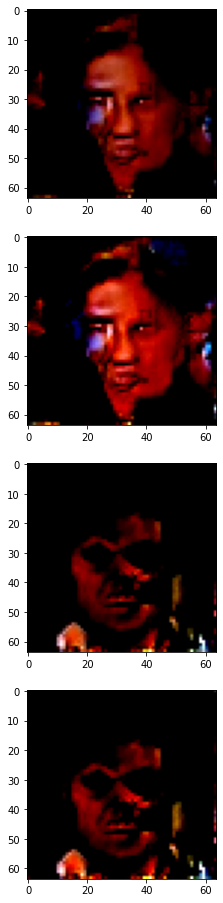

Currently on epoch 98
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.376260757446289 and Discriminator loss: 0.09062529355287552


<Figure size 432x288 with 0 Axes>

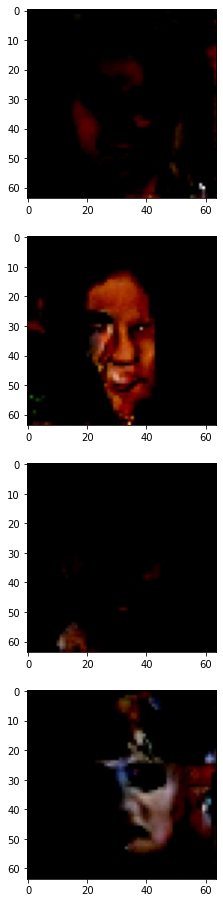

Currently on epoch 99
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 4.606046676635742 and Discriminator loss: 0.07895908504724503


<Figure size 432x288 with 0 Axes>

Currently on epoch 100
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 3.865427255630493 and Discriminator loss: 0.1002788245677948


<Figure size 432x288 with 0 Axes>

Currently on epoch 101
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58
	 currently on batch number 30 of 58
	 currently on batch number 40 of 58
	 currently on batch number 50 of 58


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


	 Generator loss: 6.406393051147461 and Discriminator loss: 0.2226620316505432


<Figure size 432x288 with 0 Axes>

Currently on epoch 102
	 currently on batch number 10 of 58
	 currently on batch number 20 of 58


KeyboardInterrupt: ignored

In [27]:
coding_size=100
for epoch in range(epochs):
    print(f"Currently on epoch {epoch+1}")
    i=0
    for X_batch in dataset:
        i=i+1
        if i%10 ==0:
            print(f"\t currently on batch number {i} of {len(my_data)//batch_size}")
        noise = tf.random.normal(shape=[batch_size,coding_size])
        gen_images = generator(noise)
        x_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch,tf.float32)],axis=0)
        y1 = tf.constant([[0.0]]*batch_size+[[1.0]]*batch_size)
        y1 = np.asarray(y1)
        discriminator.trainable = True
        d_loss = discriminator.train_on_batch(x_fake_vs_real,y1)

        #Train Generator
        noise = tf.random.normal(shape=[batch_size,coding_size])
        y2 = tf.constant([[1.0]]*batch_size)
        g_loss = GAN.train_on_batch(noise,y2)
    print(f"\t Generator loss: {g_loss} and Discriminator loss: {d_loss}")
    noise = tf.random.normal(shape=[10,coding_size])
    images = generator(noise)
    plt.figure()
    f, axarr = plt.subplots(4,1,figsize=(16,16))
    axarr[0].imshow(cv2.cvtColor((images[0]).numpy(), cv2.COLOR_BGR2RGB)) 
    axarr[1].imshow(cv2.cvtColor((images[1]).numpy(), cv2.COLOR_BGR2RGB))   
    axarr[2].imshow(cv2.cvtColor((images[2]).numpy(), cv2.COLOR_BGR2RGB))  
    axarr[3].imshow(cv2.cvtColor((images[3]).numpy(), cv2.COLOR_BGR2RGB))   
 
 
    plt.show()


In [32]:

noise = np.random.normal(0,1 ,size=(10,coding_size))
gen_images = gen_model.predict_on_batch(noise)
plt.imshow(((images[0])).numpy())



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [ ]:
generator.save('/content')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/assets
